In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# Inferring N95-mode Results from N99-mode Results and Filtration Efficiency

## What is Quantitative Fit Testing? What is a Fit Factor?

Quantitative Fit Testing (QNFT) helps people figure out how protective a mask is on their face. A sampling tube is attached to a probe on the mask to sample the concentration inside the mask, while another sampling tube samples the air right outside the mask. Dividing the concentration of the outside air, $C_\text{ambient}$, by the concentration of the air within the mask, $C_\text{mask}$, tells us how many more times cleaner the air is when wearing a mask vs. when not wearing a mask. This particular measurement is called the fit factor:

$$
\begin{equation}
\begin{aligned}
    \text{FF} &= \frac{C_\text{ambient}}{C_\text{mask}}
\end{aligned}
\end{equation}
$$


## N95-mode vs N99-mode

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/size-ranges.png">
</center>

QNFT enthusiasts are likely to own a TSI PortaCount. A PortaCount samples aerosols between 0.02 to 1 microns. The Most Penetrating Particle Sizes (i.e. the hardest to filter) are between 0.1 and 0.3 microns. There are two modes of measurement for a PortaCount: N99 mode and N95 mode. N99 tests both filtration efficiency of the media and leakage. While breathing in, particles can exist within the mask either because the filter being used is relatively weak or air with particles bypassed the filter via a gap. N95 filters have a lower bound of 95% filtration efficiency at MPPS. On the other hand, N99 filters have a lower bound of 99% at MPPS. N100 have even more stringent lower bounds at 99.97%. The better the filter being used with the mask, the less likely a particle within the mask had passed through the filter, and the more likely the particle came from leakage. In other words, when using N99 mode, the better the filter being used, the more the "fit factor" is actually about fit.

N95-mode testing, on the other hand, makes it easier to focus on the "fit" of the "fit factor" for weaker filters by focusing sampling on really-easy-to-filter particle sizes (E.g. 0.04 microns) using the N95 Companion.   

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/typical-efficiency-curve.png" width='500'>
</center>

See [this wonderful few pages from TSI](https://www.yumpu.com/en/document/read/5308400/n95-companion-model-8095-application-note-iti-053-tsicom) to understand the difference between N99 and N95 modes.

## Why does the distinction matter?

For airborne pathogens, they are likely to be suspended in the air by riding aerosols with the size of 0.3 microns and above. **When wearing an N95, using N95-mode to get fit factors is a better estimate of protection against bioaerosols compared to using N99-mode.** However, most amateur PortaCount owners have N99 mode by default. Reporting N99-mode results underestimates the efficacy of N95 respirators against bioaerosols like SARS-CoV-2, TB, Flu, etc.

## Workaround

N95-mode fit factors can be bounded using N99-mode fit-testing results and filtration efficiency data. The concentration inside the mask $C(t)$ is as follows:

$$
\begin{equation}
\begin{aligned}
C(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{filtered} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$



| Variable | Explanation | Unit |
| - | - | - |
| $C_{\text{ambient}}$ | The concentration of particles outside the mask | # particles / $\text{cm}^3$ |
| $Q_{\text{ambient}}$ | Volume of air coming in from leaks per minute | $\text{cm}^3 / \text{min}$ |
| $C_{\text{filtered}}$ | The concentration of particles right after air goes through the filter | # particles / $\text{cm}^3$ |
| $Q_{\text{filtered}}$ | Volume of air coming through the filter per minute | $\text{cm}^3 / \text{min}$ 

## Derivation

Someone is breathing with a mask on:

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/mask-leakage-and-filtration.jpeg" width='500'>
</center>

The mask can be thought of as a (really small) house with air coming in. Some are going through the filter (e.g. N95) while some go through the window (i.e. leakage):

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/house-with-a-filter-and-window-open.jpeg" width='500'>
</center>

Air from the outside has some concentration:

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/outdoor-particle-count.jpeg" width='500'>
</center>

While inside, we can sample the two air sources right as they get inside. Some of the air goes through the filter, and some don't (i.e. leakage):

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/indoor-particle-count.jpeg" width='750'>
</center>


$$
\begin{equation}
\begin{aligned}
\frac{dC(t)}{dt} &= \frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})}{V}
\end{aligned}
\end{equation}
$$


The above describes the data generating process. Air is being added into the system due to gaps ($Q_\text{ambient}$). The number of particles being introduced due to gaps is $Q_\text{ambient} \cdot C_\text{ambient}$. In terms of units, we get $\text{\# particles} / \text{cm}^3 \cdot  \text{cm}^3 / \text{min} = \text{\# particles} / \text{min}$ .
Air is also being added into the system via the filter. The number of particles that got in the mask via the filter is $Q_\text{filtered} \cdot C_\text{filtered}$, which also has the units $\text{\# particles} / \text{min}$. An equivalent amount of air is being removed from the system (i.e. $C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})$). That also has $\text{\# particles} / \text{min}$ units. Dividing by the volume $V$, we get $\text{\# particles} / \text{cm}^3 / \text{min}$.

$$
\begin{equation}
\begin{aligned}
\frac{dC(t)}{dt} &= \frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})}{V} \\
V \cdot \frac{dC(t)}{dt} &= C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) \\
B_t &= C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) \\
B_0 &= C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(0) \cdot (Q_\text{ambient} + Q_\text{filtered}) \\
\frac{dBt}{dt} &= -(Q_\text{ambient} + Q_\text{filtered}) \frac{dC_t}{dt} \\
\frac{1}{-(Q_\text{ambient} + Q_\text{filtered})} \frac{dB_t}{dt} &= \frac{dC_t}{dt} \\
\frac{V}{-(Q_\text{ambient} + Q_\text{filtered})} \frac{dB_t}{dt} &= B_t \\
\frac{dB_t}{B_t} &= \frac{-(Q_\text{ambient} + Q_\text{filtered})}{V} dt \\
dlog(B_t) &= \frac{-(Q_\text{ambient} + Q_\text{filtered})}{V} dt \\
log(B_t) - log(B_0) &= \frac{-(Q_\text{ambient} + Q_\text{filtered})}{V} dt \\
e^{log(B_t) - log(B_0)} &= e^{( -(Q_\text{ambient} + Q_\text{filtered}) ) / V \cdot t}  \\
\frac{B_t}{B_0} &= e^{( -(Q_\text{ambient} + Q_\text{filtered}) ) / V \cdot t}  \\
\frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) }{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(0) \cdot (Q_\text{ambient} + Q_\text{filtered})} &= e^{(-Q_\text{ambient} + Q_\text{filtered }) / V \cdot t}
\end{aligned}
\end{equation}
$$



Since $V$ (i.e. the volume of air between the mask and the face) is very small relative to the total amount of air being breathed in, then the right hand side goes to 0:
$$
\begin{equation}
\begin{aligned}
\frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) }{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(0) \cdot (Q_\text{ambient} + Q_\text{filtered})} &= 0 \\
C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})  &= 0 \\
C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} &= C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})  \\
\frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} &= C(t)   \\
C(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$

From here we can see that the concentration inside the mask is a weighted average of the ambient concentration $C_\text{ambient}$ and the filtered concentration $C_\text{filtered}$.



## Concentration within the mask under N99 mode for an N95 filter

With a weaker filter like an N95, $C_\text{filtered}$ is non 0:

$$
\begin{equation}
\begin{aligned}
C_\text{N99-mode}(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&\qquad+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
&= C_\text{ambient} \cdot (1 - \frac{Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}}) \\
&\qquad+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$



## Concentration within the mask under N95-mode for an N95 filter

When using N95-mode testing, the particles are filtered to very-easy-to-filter particles using the N95 companion before it hits the mask, so $C_\text{filtered}$ is essentially 0:

$$
\begin{equation}
\begin{aligned}
C_\text{N95-mode}(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
&= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$

## N95-mode Fit Factor

$$
\begin{equation}
\begin{aligned}
FF_\text{N95-mode} &= \frac{C_\text{ambient}} {C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}}} \\ 
&= \frac{1} {\frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}}} \\ 
&= \frac{{Q_\text{ambient} + Q_\text{filtered}}}{Q_\text{ambient}} \\ 
\end{aligned}
\end{equation}
$$

The N95-mode fit factor is the overall rate of air coming in divided by the rate of air coming in due to leakage. 


## Inferring N95-mode results from filtration efficiency and N99-mode results

Given N99 mode fit factors and filtration efficiency data, we can find $Q_\text{ambient}$ and $Q_\text{filtered}$. Once we have those, we can figure infer N95-mode results.

Recall the N99-mode concentration inside the mask:

$$
\begin{equation}
\begin{aligned}
C_\text{N99-mode}(t) &= C_\text{ambient} \cdot (1 - \frac{Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}}) \\
&\qquad+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$


If we get the fit factor for N99 mode, $FF_\text{N99-mode}$ and we know the ambient concentration $C_\text{ambient}$, then we can get $C_\text{N99-mode}$:

$$
\begin{equation}
\begin{aligned}
FF_\text{N99-mode} &= \frac{C_\text{ambient}}{C_\text{N99-mode}} \\
C_\text{N99-mode} &= \frac{C_\text{ambient}}{FF_\text{N99-mode}} \\
\end{aligned}
\end{equation}
$$



From there we can infer the air delivery rate that is going through the filter, $Q_\text{filtered}$:

$$
\begin{equation}
\begin{aligned}
C_\text{N99-mode} &= C_\text{ambient} \cdot \frac{Q- Q_\text{filtered}} {Q} + C_\text{filtered} \cdot \frac{Q_\text{filtered}}{Q} \\
Q \cdot C_\text{N99-mode} &= C_\text{ambient} \cdot (Q- Q_\text{filtered}) + C_\text{filtered} \cdot Q_\text{filtered} \\
Q \cdot C_\text{N99-mode} &= C_\text{ambient} \cdot Q - C_\text{ambient} \cdot Q_\text{filtered} + C_\text{filtered} \cdot Q_\text{filtered} \\
Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q &= - C_\text{ambient} \cdot Q_\text{filtered} + C_\text{filtered} \cdot Q_\text{filtered} \\
Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q &= Q_\text{filtered} \cdot (-C_\text{ambient}  + C_\text{filtered})  \\
\frac{Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q}{-C_\text{ambient}  + C_\text{filtered}  } &= Q_\text{filtered} \\
\end{aligned}
\end{equation}
$$


We can also represent $C_\text{filtered}$ in terms of filtration efficiency of the mask filter, $F_e$:

$$
\begin{equation}
\begin{aligned}
C_\text{filtered} = C_\text{ambient} \cdot (1 - F_e)
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
Q_\text{filtered} &= \frac{Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q}{-C_\text{ambient}  + C_\text{filtered}  } \\
&= \frac{Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q}{-C_\text{ambient}  +  C_\text{ambient} \cdot (1 - F_e) } \\
&= \frac{Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q}{C_\text{ambient}  \cdot  (-1 + 1 - F_e )} \\
&= \frac{Q \cdot C_\text{N99-mode} - C_\text{ambient} \cdot Q}{-C_\text{ambient}  \cdot  F_e } \\
&= \frac{Q \cdot C_\text{ambient} - C_\text{N99-mode} \cdot Q}{C_\text{ambient}  \cdot  F_e } \\
\end{aligned}
\end{equation}
$$


In [2]:
%pwd

'/Users/eddericugaddan/code/breathesafe/python/mask_recommender/notebooks'

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fit_testing import find_air_delivery_rate_filtered


If we observe a fit factor of 20, and the mask has a 95% filtration efficiency, then all the air must have gone through the filter:

In [4]:
find_air_delivery_rate_filtered(
    c_ambient = 1000,
    c_mask = 50,
    filtration_efficiency=0.95,
    air_delivery_rate=6000
)

6000.0

In [5]:
find_air_delivery_rate_filtered(
    c_ambient = 1000,
    c_mask = 60,
    filtration_efficiency=0.95,
    air_delivery_rate=6000
)

5936.842105263158

Once we have $Q_\text{filtered}$, and because we have $Q$, we can derive the rate of air coming in due to leakage, $Q_\text{ambient}$:

$$
\begin{equation}
\begin{aligned}
Q &= Q_\text{filtered} + Q_\text{ambient} \\
Q - Q_\text{filtered} &=  Q_\text{ambient}
\end{aligned}
\end{equation}
$$


From here, we could then compute the N95-mode fit factor, $FF_\text{N95-mode}$, using the proportion of air that is filtered, $P_\text{filtered}$:

$$
\begin{equation}
\begin{aligned}
FF_\text{N95-mode} &= \frac{Q_\text{ambient} + Q_\text{filtered}}{Q_\text{ambient}} \\
\frac{1}{FF_\text{N95-mode}} &= \frac{Q_\text{ambient}}{Q_\text{ambient}  + Q_\text{filtered}} \\
&= \frac{Q - Q_\text{ambient}}{Q_\text{ambient}  + Q_\text{filtered}} \\
&= 1 - \frac{Q_\text{filtered}}{Q_\text{ambient}  + Q_\text{filtered}} \\
&= 1 - P_\text{filtered} \\
\frac{1}{1 - P_\text{filtered}} &= FF_\text{N95 mode}
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
Q_{\text{filtered}} &= Q \cdot \frac{ C_\text{ambient} - C_\text{mask} }{C_\text{ambient} \cdot \text{FE}(\text{mask})} \\
&= Q \cdot \text{ER}(\text{exercise}) / \text{FE}(\text{mask}) & \text{ER is the overall exposure reduction, combining effects of Fit and Filtration Efficiency} \\
\hat{FF_{N95}(\text{exercise})} &= Q / (Q - Q_{filtered}) \\
&= Q / (Q -  Q \cdot \text{ER}(\text{exercise}) / \text{FE}(\text{mask})) \\
&= \frac{1}{1 - \text{ER}(\text{exercise}) / \text{FE}(\text{mask})}
\end{aligned}
\end{equation}
$$


We modify $FF_{\text{N99}}$ by updating `c_ambient` and `c_mask`. We keep `air_delivery_rate_constant`. We also update filtration efficiency. Then we compute the proportion of air leaked.

In [6]:
c_ambient = 10000

In [7]:
c_masks = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

In [8]:
filt_eff_range = [0.95, 0.96, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

## get_filtered_air_delivery_rate_ratio_grid

In [9]:
def get_filtered_air_delivery_rate_ratio_grid(
    c_masks,
    filt_eff_range,
    air_delivery_rate=6000, # 6 liters per minute breathing
):
    """
    Gives a grid of proportions of air delivery rates that went through the filter.
    
    Parameters:
        c_masks: list
            List of number of particles within the mask

        filt_eff_range: list
            List of filtration efficiencies

        air_delivery_rate: float
            The total air delivery rate (filtered + leakage)

    Returns: pd.DataFrame
    """
    collection = []
    air_delivery_rate = 6000 
    
    for c_mask in c_masks:
        row = []
        
        for filt_eff in filt_eff_range:
            fraction = find_air_delivery_rate_filtered(
                    c_ambient = c_ambient,
                    c_mask = c_mask,
                    filtration_efficiency=filt_eff,
                    air_delivery_rate=air_delivery_rate
                ) / air_delivery_rate
    
            if fraction > 1:
                fraction = np.nan
                
            row.append(
                fraction
            )
    
    
        collection.append(row)

    df = pd.DataFrame(collection)
    df.columns = filt_eff_range
    df.index = np.round(c_ambient / np.array(c_masks), 5)

    return df

In [10]:
df = get_filtered_air_delivery_rate_ratio_grid(
    c_masks,
    filt_eff_range,
    air_delivery_rate=6000, # 6 liters per minute breathing
)

In [11]:
c_ambient

10000

Text(0.5, 80.7222222222222, 'Filtration efficiency')

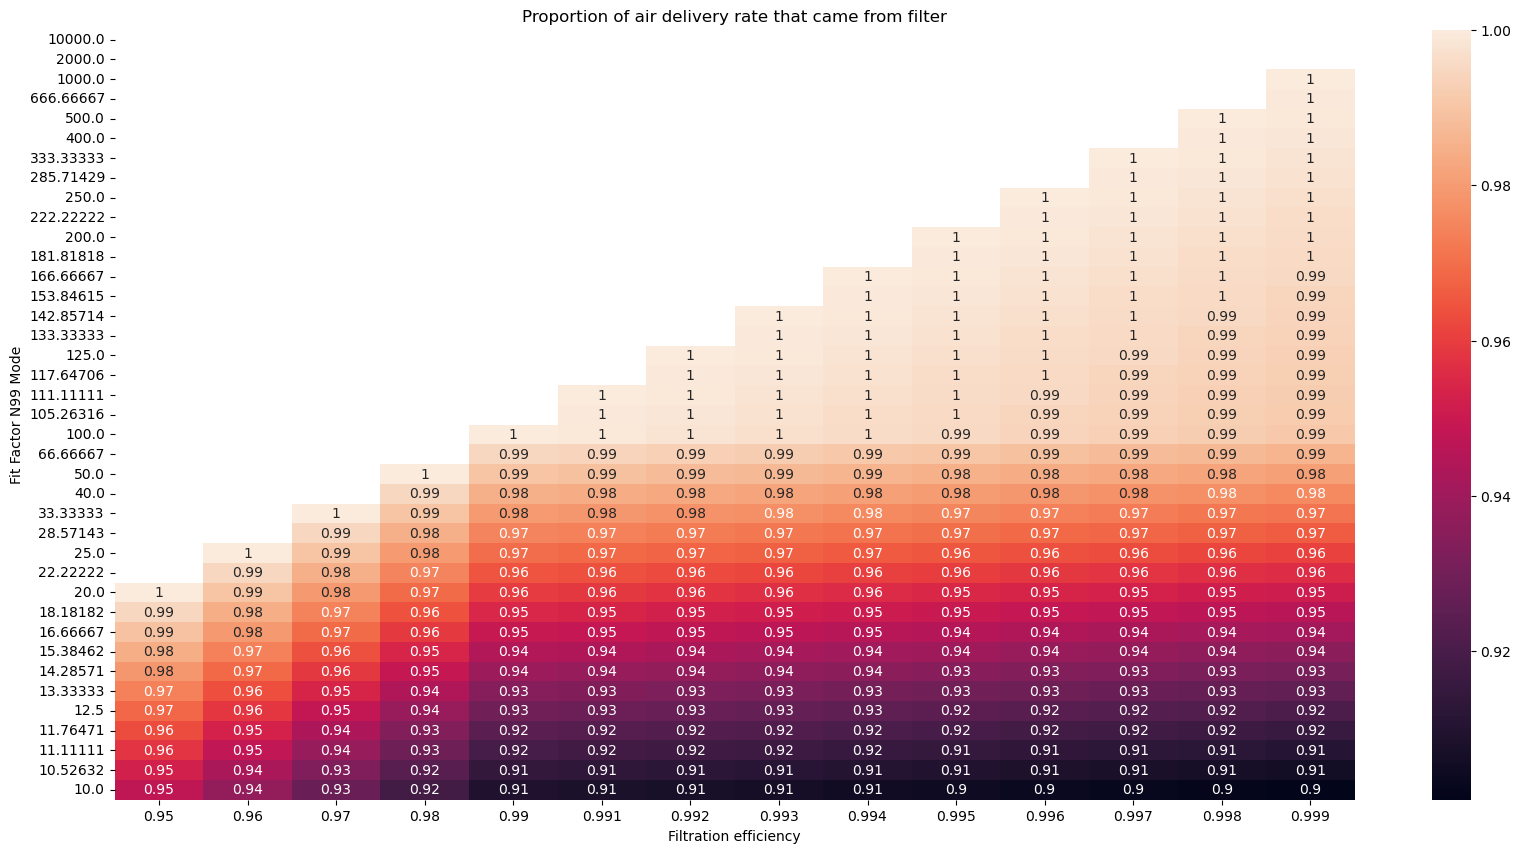

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(df, annot=True, ax=ax)
ax.set_title("Proportion of air delivery rate that came from filter")
ax.set_ylabel("Fit Factor N99 Mode")
ax.set_xlabel("Filtration efficiency")
# ax.set_xticklabels('Single pass filtration efficiency')

## Get N95 fit factors from Filtration Efficiency and N99 Fit Factors

In [13]:
n95_fit_factors = 1 / (1 - df)

Text(0.5, 1.0, 'Predicted N95-mode Fit Factor by Overall Filtration Efficiency and N99-mode Fit Factor')

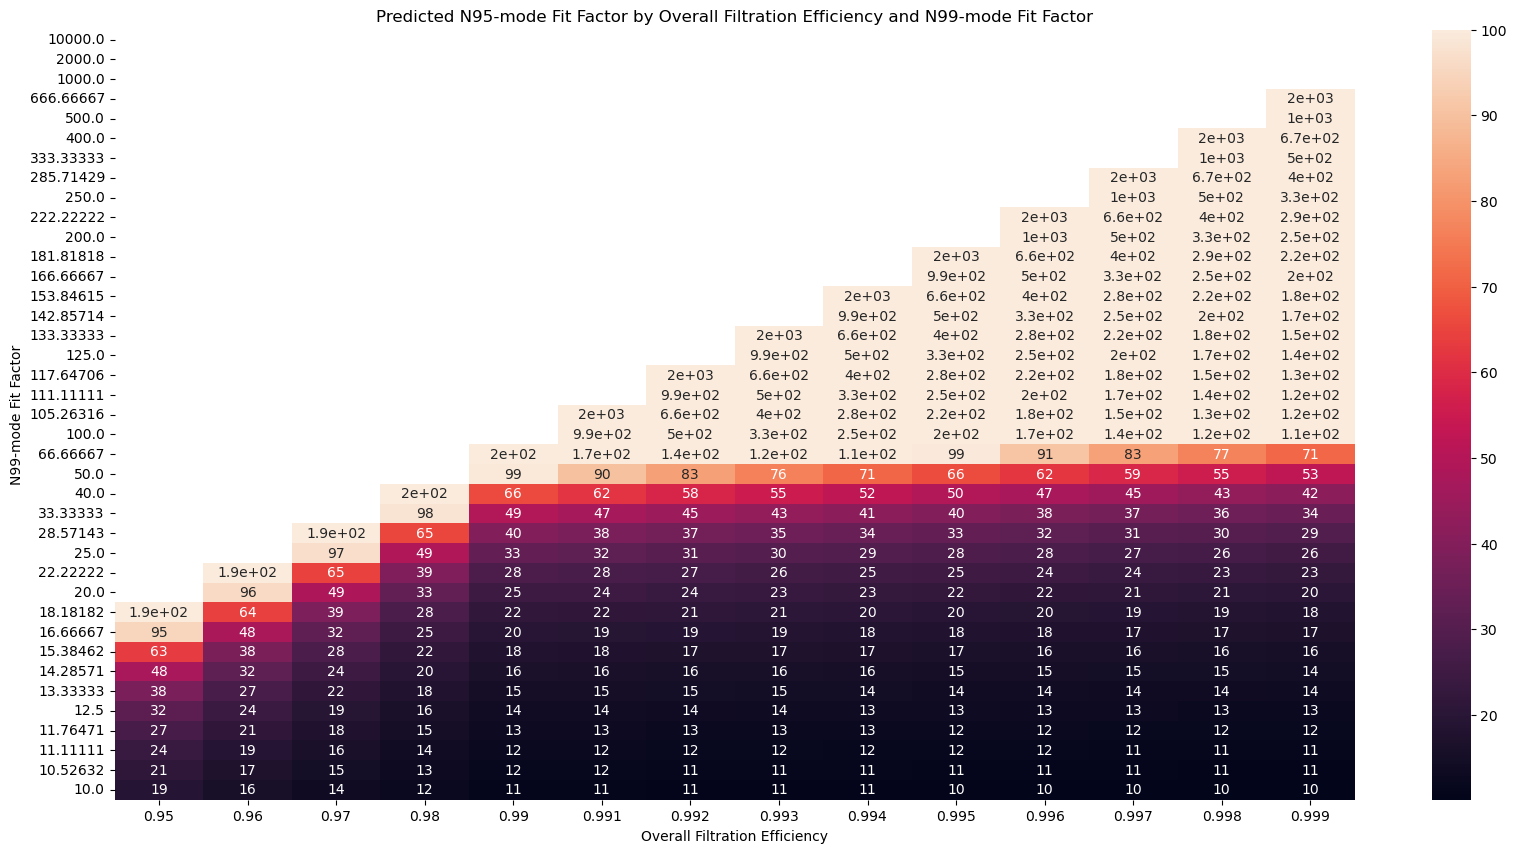

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(
    n95_fit_factors,
    vmax=100,
    annot=True,
    ax=ax
)
ax.set_xlabel('Overall Filtration Efficiency')
ax.set_ylabel("N99-mode Fit Factor")
ax.set_title("Predicted N95-mode Fit Factor by Overall Filtration Efficiency and N99-mode Fit Factor")

## Observations

- It is possible to get high N95-mode Fit Factors even when N99-mode scores are relatively low because the overall filtration efficiency of a mask is low. This implies high protection for bioaerosols even when N99-mode FF are much lower. 

- As overall filtration efficiency gets really high, the N99-mode fit factor should be roughly equivalent to the N95-mode fit factor.

## What is the overall filtration efficiency?

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/typical-efficiency-curve.png" width='500'>
</center>

Recall that submicron filters have a U-shape, with the most penetrating particle sizes in between 0.1 to 0.3 microns. Filtration efficiency depends on size of the particles. The overall filtration efficiency is the following:

$$
\begin{equation}
\begin{aligned}
F_e &= \frac{C_\text{ambient} - \sum_s F_e(s) \cdot C_\text{ambient}(s)}{C_\text{ambient}}
\end{aligned}
\end{equation}
$$


Data from the filtration efficiency curve in the image above is used below:

In [15]:
example_filtration_eff_distribution_over_particle_size = pd.DataFrame({
    'particle_size': [0.04, 0.07, 0.1, 0.15, 0.17, 0.2, 0.28, 0.33, 0.4, 0.6, 1.0],
    '% efficiency': [99.98, 99.7, 98.2, 95, 94.8, 95, 96, 97, 98, 98.6, 99.6]
}).set_index('particle_size')

In [16]:
example_filtration_eff_distribution_over_particle_size

,% efficiency
particle_size,
0.04,99.98
0.07,99.70
0.10,98.20
0.15,95.00
0.17,94.80
0.20,95.00
0.28,96.00
0.33,97.00
0.40,98.00


Text(0.5, 1.0, 'Typical N95 filtration efficiency distribution over particle size')

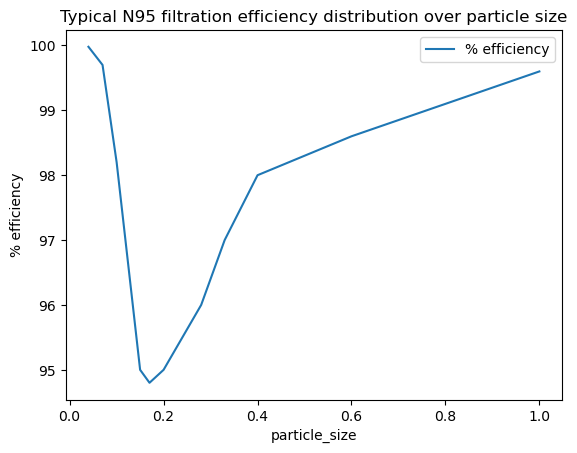

In [17]:
fig, ax = plt.subplots(1,1)
example_filtration_eff_distribution_over_particle_size.plot(ax=ax)
ax.set_ylabel('% efficiency')
ax.set_title("Typical N95 filtration efficiency distribution over particle size")

### flat distribution example

In [18]:
flat_distribution = example_filtration_eff_distribution_over_particle_size.copy()

In [19]:
flat_distribution['c_ambient'] = 100

In [20]:
print(f"Total sum of particles / cm3 is {flat_distribution['c_ambient'].sum()}")

Total sum of particles / cm3 is 1100


In [21]:
c_ambient_flat = flat_distribution.drop(columns=['% efficiency'])
c_ambient_flat

,c_ambient
particle_size,
0.04,100
0.07,100
0.10,100
0.15,100
0.17,100
0.20,100
0.28,100
0.33,100
0.40,100


In [22]:
leftover = (1 - example_filtration_eff_distribution_over_particle_size['% efficiency'] / 100) * c_ambient_flat['c_ambient']
leftover

particle_size
0.04    0.02
0.07    0.30
0.10    1.80
0.15    5.00
0.17    5.20
0.20    5.00
0.28    4.00
0.33    3.00
0.40    2.00
0.60    1.40
1.00    0.40
dtype: float64

The concentration drops to 28.12 in this example after the flat distribution of aerosols passes the hypothetical filter.

In [23]:
leftover.sum()

28.120000000000026

In [24]:
(c_ambient_flat.sum() - leftover.sum()) / c_ambient_flat.sum()

c_ambient    0.974436
dtype: float64

The overall submicron filtration efficiency of this hypothetical filter is 97.44% assuming a uniform distribution of particles.

### Challenges

However, we typically don't know the actual distribution of ambient particles, and what the filtration efficiency curve is like for a particular filter. If we could somehow figure out the overall submicron filtration efficiency of a mask at a normal breathing rate, for a particular aerosol type, we could perhaps get a good estimate of N95-mode fit factors using the mathematics above.

## Experiments

### Procedure:
* Use the OSHA Fast Filtering Facepiece Respirator procedure without the Talking exercise (Bend Over, Side-to-Side, Up-and-Down) in N99 mode.
* In addition, do a normal breathing exercise with gaps sealed via the Aaron method (i.e. seal the gaps with your hands) to estimate the filtration efficiency.
* Adjust the N99-mode results with the filtration efficiency estimate.
* Take the overall fit factor estimate (HMFF).
* Binarize the overall N95-mode fit factor as being greater than or equal to 100 (Pass).

### Estimating Filtration Efficiency

The filtration efficiency at normal breathing rates is estimated by the following:
$$
\begin{equation}
\begin{aligned}
\text{denominator} &= \text{max}(FF_{\text{N99, normal breathing, sealed}}, FF_{\text{N99, bend over}}, ...) + 1 \\
\hat{\text{FE}_{\text{normal breathing}}} &= 1 - 1 / \text{denominator}
\end{aligned}
\end{equation}
$$

where $\hat{FF_{\text{N99, normal breathing, sealed}}}$ is the N99-mode fit factor at normal breathing rates with gaps sealed using the Aaron method.

### Convert N99-mode result to exposure reduction estimate.
$$
\begin{equation}
\begin{aligned}
\text{ER}(\text{exercise}) = 1 - 1 / \text{FF}_{\text{N99-mode}}(\text{exercise})
\end{aligned}
\end{equation}
$$

### N95-mode fit factor estimate of an exercise

$$
\begin{equation}
\begin{aligned}
   \hat{\text{FF}_{\text{N95}}}(\text{exercise}) = \frac{1}{1 - \text{ER}(\text{exercise}) / \hat{\text{FE}_{\text{normal breathing}}}} \cdot 2
\end{aligned}
\end{equation}
$$

The 2 is a bias-adjustment factor. It's in there to improve the sensitivity of the model. Sensitivity is the measure of "out of these masks that fit, how many does get correct?"

### Take the harmonic mean fit factor (HMFF):

$$
\begin{equation}
\begin{aligned}
    \hat{\text{N95-mode HMFF}} = \frac{n}{1 / \hat{\text{FF}_{\text{N95}}}(\text{exercise 1}) + ... + 1 / \hat{\text{FF}_{\text{N95}}}(\text{exercise n})}
\end{aligned}
\end{equation}
$$



### Data set

I combined two data sets: one that obviously does not fit my face, as the masks in them are way too small or way too big. Those get assigned a N99-mode fit factor of 1. Running the procedure above will generate N95-mode FF estimates that are way less than 100, so they all are marked as failing N95-mode. The other data set of masks aren't way too big or way too small and have a remote chance of actually fitting my face. Those went through the whole procedure of N99-mode testing, and then another N95-mode testing. For those, I made predictions using the procedure above. 

In [43]:
from fit_testing import estimate_n95_mode_ff_from_n99_mode_results, \
    preprocess_fit_tests, assume_ff_1_since_no_fit, get_qnft, \
    compute_predicted_n95_mode_for_n99_and_n95_data, \
    add_fit_factor_columns

from metrics import sensitivity, specificity

In [26]:
date = '2025-04-09'
masks = pd.read_csv(f'../data/sql_imports/{date}-masks.csv')

In [27]:
fit_tests = pd.read_csv(f'../data/sql_imports/{date}-fit_tests.csv')

In [28]:
fit_tests = preprocess_fit_tests(fit_tests)

In [29]:
fit_tests_with_mask_info = \
    fit_tests.merge(masks[['unique_internal_model_code', 'filtration_efficiencies', 'breathability', 'id']], left_on='mask_id', right_on='id', suffixes=('_fit_test', '_mask'))

fit_tests_with_mask_info = fit_tests_with_mask_info[
    fit_tests_with_mask_info['first_name'] == 'Edderic'
]

In [30]:
too_big_or_too_small_masks = fit_tests_with_mask_info[
    (fit_tests_with_mask_info['first_name'] == 'Edderic') &
    (fit_tests_with_mask_info['too_small_or_big'].isin(["Too small", "Too big"]))
]

In [31]:
not_good_fit_df = assume_ff_1_since_no_fit(too_big_or_too_small_masks)
not_good_fit_df

,unique_internal_model_code,fit_factor_n99,fit_factor_n95,predicted_fit_factor_n95,clipped_predicted_fit_factor_n95,actual n95 / clipped predicted n95
145,Well Before KN95 3D Mask w/ Earloops - Petite XS,NaN,1.0,1.0,1.0,1.0
149,Well Before KN95 3D Mask w/ Earloops - Petite ...,NaN,1.0,1.0,1.0,1.0
196,Savewo 3D Meow 2-6 years,NaN,1.0,1.0,1.0,1.0
197,Lutema M94K,NaN,1.0,1.0,1.0,1.0
198,Canada Masq Q100 Small,NaN,1.0,1.0,1.0,1.0
199,Canada Masq Q100 XS,NaN,1.0,1.0,1.0,1.0
201,Zimi 95S Earloop,NaN,1.0,1.0,1.0,1.0
202,Zimi 95S Headloop,NaN,1.0,1.0,1.0,1.0
261,BreatheTeq - XS,NaN,1.0,1.0,1.0,1.0
702,BreatheTeq - X-Large,NaN,1.0,1.0,1.0,1.0


In [32]:
fit_tests_with_mask_info['first_name'] == 'Edderic'

9      True
11     True
12     True
30     True
31     True
       ... 
797    True
798    True
799    True
808    True
817    True
Name: first_name, Length: 98, dtype: bool

In [33]:
edderic_n99 = get_qnft(fit_tests_with_mask_info, mode='N99')
edderic_n95 = get_qnft(fit_tests_with_mask_info, mode='N95')

# Filter out some results to handle some outliers that were probably
# a result of experimental error.
# E.g. For a 3M Aura 1870+ N99-mode result, 6 months prior to doing the N95-mode test, 
# I scored a 151.2. 3M Aura is known to have filtration efficiencies greater than 99%, 
# So N99-mode should be close to N95-mode results, assuming the same fit in both experiments.
# (i.e. filtration efficiency is high enough that basically any particle that is being detected
# is probably from leakage, and the N99 "Fit" Factor is actually about fit).
# I redid the N95-mode test for that after adjusting the mask on my face,
# and got the maximum 200+ result that one can get with the 
# N95-companion. Removing the low result here.
edderic_n95 = edderic_n95[
    ~edderic_n95['id_fit_test'].isin(
        [
            266, 
            23, 
            1127,
            396, # ZM9233 that had slight leakage
            1186, # 1870+ Aura that had slight leakage
            1173, # Laianzhi HYX1002 Large, had slight leakage,
            1125 # ZM9541 headstrap with some leakage
        ]
    )
] 

In [34]:
edderic_n95[edderic_n95['unique_internal_model_code'].str.contains('Shawmut')]['user_id']

780    99
Name: user_id, dtype: int64

In [35]:
n99_n95_merge = edderic_n99.merge(edderic_n95, left_on=['mask_id', 'facial_hair_short'], right_on=['mask_id', 'facial_hair_short'], suffixes=('_n99', '_n95'))

In [36]:
n99_n95_merge = edderic_n99.merge(edderic_n95, left_on=['mask_id', 'facial_hair_short'], right_on=['mask_id', 'facial_hair_short'], suffixes=('_n99', '_n95'))

In [37]:
less_dims = n99_n95_merge[
    ['unique_internal_model_code_n99'] + list(
        n99_n95_merge.columns[
            n99_n95_merge.columns.str.contains('quantitative_ex_')
        ]
    )
]

In [38]:
less_dims[less_dims['unique_internal_model_code_n99'].str.contains('Shawmut')]

,unique_internal_model_code_n99,quantitative_ex_0_name_n99,quantitative_ex_0_fit_factor_n99,quantitative_ex_1_name_n99,quantitative_ex_1_fit_factor_n99,quantitative_ex_2_name_n99,quantitative_ex_2_fit_factor_n99,quantitative_ex_3_name_n99,quantitative_ex_3_fit_factor_n99,quantitative_ex_4_name_n99,...,quantitative_ex_5_name_n95,quantitative_ex_5_fit_factor_n95,quantitative_ex_6_name_n95,quantitative_ex_6_fit_factor_n95,quantitative_ex_7_name_n95,quantitative_ex_7_fit_factor_n95,quantitative_ex_8_name_n95,quantitative_ex_8_fit_factor_n95,quantitative_ex_9_name_n95,quantitative_ex_9_fit_factor_n95
22,Shawmut Protex SR9520S - Small,Bending over,64,Talking,30,Turning head side to side,61,Moving head up and down,75,Normal breathing (SEALED),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
n95_mode_and_n99_mode_by_exercise = compute_predicted_n95_mode_for_n99_and_n95_data(less_dims, removables=['Normal breathing (SEALED)'])
n95_mode_and_n99_mode_by_exercise_without_talking = compute_predicted_n95_mode_for_n99_and_n95_data(
    less_dims, 
    removables=[
        'Normal breathing (SEALED)',
        'Talking'
    ]
)

In [40]:
n95_mode_and_n99_mode_by_exercise_without_talking

,unique_internal_model_code,name,fit_factor_n99,fit_factor_n95,filtration_efficiency,predicted_fit_factor_n95,clipped_predicted_fit_factor_n95,actual n95 / clipped predicted n95
0,Makrite 801-N95 TC-84A,Turning head side to side,58,154,0.993289,188.659341,188.659341,0.816286
2,Makrite 801-N95 TC-84A,Bending over,148,200,0.993289,43808.000000,200.000000,1.0
4,Makrite 801-N95 TC-84A,Moving head up and down,47,200,0.993289,136.392157,136.392157,1.46636
0,Drager X-plore 1950 - Small,Bending over,83,200,0.991304,591.375000,200.000000,1.0
2,Drager X-plore 1950 - Small,Turning head side to side,58,200,0.991304,232.000000,200.000000,1.0
...,...,...,...,...,...,...,...,...
2,Zimi ZM9541 w/Headstraps,Turning head side to side,16,200,0.979167,47.000000,47.000000,4.255319
3,Zimi ZM9541 w/Headstraps,Moving head up and down,24,200,0.979167,94.000000,94.000000,2.12766
0,Zimi ZM9541 w/Headstraps,Bending over,31,25,0.979167,171.411765,171.411765,0.145848
2,Zimi ZM9541 w/Headstraps,Turning head side to side,16,30,0.979167,47.000000,47.000000,0.638298


In [41]:
overall_ffs = add_fit_factor_columns(pd.concat([n95_mode_and_n99_mode_by_exercise, not_good_fit_df]))
overall_ffs

,fit_factor_n99,actual_fit_factor_n95,predicted_fit_factor_n95,pass_n99,pass_n95_predicted,pass_n95_actual,clipped_predicted_fit_factor_n95,actual_ff_n95 / clipped_predicted_ff_n95
unique_internal_model_code,,,,,,,,
3M 1860s,26.489361,92.733794,65.423527,False,False,False,65.423527,1.417438
3M 1870+ AURA™,150.495900,200.000000,200.000000,True,True,True,200.000000,1.000000
3M 9502+,28.791107,142.923434,118.672531,False,True,True,118.672531,1.204351
3M Aura Particulate Respirator 9205+ N95,153.982620,200.000000,200.000000,True,True,True,200.000000,1.000000
BreatheTeq - Large,NaN,1.000000,1.000000,False,False,False,1.000000,1.000000
BreatheTeq - X-Large,NaN,1.000000,1.000000,False,False,False,1.000000,1.000000
BreatheTeq - XS,NaN,1.000000,1.000000,False,False,False,1.000000,1.000000
Canada Masq Q100 Small,NaN,1.000000,1.000000,False,False,False,1.000000,1.000000
Canada Masq Q100 XS,NaN,1.000000,1.000000,False,False,False,1.000000,1.000000


In [42]:
overall_ffs_without_talking = add_fit_factor_columns(pd.concat([n95_mode_and_n99_mode_by_exercise_without_talking, not_good_fit_df]))
overall_ffs_without_talking.sort_values(by='actual_ff_n95 / clipped_predicted_ff_n95')

,fit_factor_n99,actual_fit_factor_n95,predicted_fit_factor_n95,pass_n99,pass_n95_predicted,pass_n95_actual,clipped_predicted_fit_factor_n95,actual_ff_n95 / clipped_predicted_ff_n95
unique_internal_model_code,,,,,,,,
"Makrite 9500-N95, M/L Size, NIOSH 84A-5411, FDA 510(k) cleared as a surgical N95",33.600000,15.882353,78.890075,False,False,False,78.890075,0.201323
Makrite 9500S Surgical NIOSH N95 Size Small headstraps,33.613842,52.910246,106.814347,False,True,False,106.814347,0.495348
Laianzhi HYX1002 Black KN100 - Medium,271.156244,112.058046,200.000000,True,True,True,200.000000,0.560290
Zimi ZM9541 w/Headstraps,21.990148,49.754793,79.472727,False,False,False,79.472727,0.626061
"O&M Halyard, Inc. N95 46727",33.328194,79.911993,113.051194,False,True,False,113.051194,0.706866
3M 9502+,33.733719,130.508475,169.794050,False,True,True,169.794050,0.768628
Zimi ZM100,31.255507,50.581575,63.955037,False,False,False,63.955037,0.790893
Honeywell DC365N95HC NIOSH Surgical N95 Respirator,55.037025,180.478088,200.000000,False,True,True,200.000000,0.902390
Shawmut Protex SR9520S - Small,NaN,3.632792,3.940887,False,False,False,3.940887,0.921821


### Sensitivity and Specificity

In [47]:
sens = sensitivity(overall_ffs_without_talking, actual_col='pass_n95_actual', prediction_col='pass_n95_predicted')

print(f"Out of those masks that pass a fit test in N95-mode, how many did the model correctly predict as passing a fit test in N95-mode: {np.round(sens, 2)}")

spec = specificity(overall_ffs_without_talking, actual_col='pass_n95_actual', prediction_col='pass_n95_predicted')

print(f"Out of those masks that DO NOT pass a fit test in N95-mode, how many did the model correctly predict as NOT passing a fit test in N95-mode: {np.round(spec, 2)}")

Out of those masks that pass a fit test in N95-mode, how many did the model correctly predict as passing a fit test in N95-mode: 0.83
Out of those masks that DO NOT pass a fit test in N95-mode, how many did the model correctly predict as NOT passing a fit test in N95-mode: 0.89


Text(0.5, 1.0, 'Actual N95-mode vs. Predicted N95-mode results')

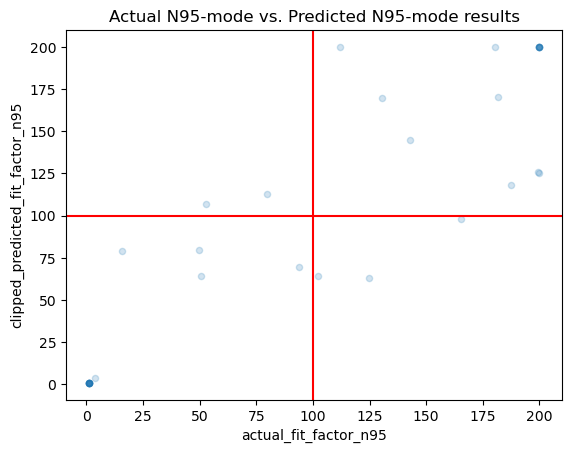

In [51]:
fig, ax = plt.subplots()
overall_ffs_without_talking.plot.scatter(x='actual_fit_factor_n95', y='clipped_predicted_fit_factor_n95', ax=ax, alpha=0.2)
ax.axvline(100, color='r')
ax.axhline(100, color='r')
ax.set_title("Actual N95-mode vs. Predicted N95-mode results")

In [52]:
overall_ffs_without_talking.shape

(36, 8)